# Extended overview figures

This notebook creates the extended overview plots from the SI information of the publication.

In [ ]:
import pickle
import sys
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm
import os

sys.path.append("../../")
sys.path.append("../../covid19_inference")
sys.path.append("../")

import covid19_soccer
from covid19_soccer.plot.utils import get_from_trace
#import covid19_inference as cov19
from header_plotting import *

In [ ]:
%load_ext autoreload
%autoreload 2

In [32]:
def load(fstr):
    with open(fstr, "rb") as f:
         return pickle.load(f)

countries = ["England","Scotland","Germany","France","Spain","Slovakia","Portugal","Netherlands","Italy","Czechia","Belgium","Austria"]
traces, models, dls = [], [], []
for country in tqdm(countries):
    #'UEFA-beta=False-country=England-offset_games=0-draw_delay=True-weighted_alpha_prior=0-prior_delay=-1-width_delay_prior=0.1-sigma_incubation=-1.0-median_width_delay=1.0-tune=200-draws=300-max_treedepth=10.pickled'
    model = None
    fstr=lambda tune, draws, max_treedepth: (f"/data.nst/smohr/covid19_soccer_data/main_traces/"+
        f"-beta=False"+
        f"-country={country}"+
        f"-offset_data=0"+
        f"-prior_delay=-1"+
        f"-width_delay_prior=0.1"+
        f"-sigma_incubation=-1.0"+
        f"-median_width_delay=1.0"+
        f"-interval_cps=10.0"+
        f"-f_fem=0.2"+
        f"-uc=True"
        f"-len=normal"+                    
        f"-t={tune}"+
        f"-d={draws}"+
        f"-max_treedepth={max_treedepth}.pkl")
    #print(fstr(4000, 8000, 12))
    fstr=lambda tune, draws, max_treedepth: (f"/data.nst/share/soccer_project/covid_uefa_traces13/run"+
        f"-beta=False"+
        f"-country={country}"+
        f"-offset_data=0"+
        f"-prior_delay=-1"+
        f"-median_width_delay=1.0"+
        f"-interval_cps=10.0"+
        f"-f_fem=0.2"+
        f"-len=normal"+
        f"-abs_sine=True"+
        f"-t={tune}"+
        f"-d={draws}"+
        f"-max_treedepth={max_treedepth}.pkl")
    if model is None and os.path.exists(fstr(500, 1000, 12)):
        try: 
            model, trace = load(fstr(500, 1000, 12))
            print(f"Use 1000 sample runs for {country}")
        except:
            pass
    if os.path.exists(fstr(4000, 8000, 12)):
        try:
            model, trace = load(fstr(4000, 8000, 12))
            print(f"Use 8000 sample runs for {country}")
        except:
            pass
    if model is None and os.path.exists(fstr(2000, 4000, 12)):
        try:
            model, trace = load(fstr(2000, 4000, 12))
            print(f"Use 4000 sample runs for {country}")
        except:
            pass
    if model is None and os.path.exists(fstr(1000, 1500, 12)):
        try: 
            model, trace = load(fstr(1000, 1500, 12))
            print(f"Use 1500 sample runs for {country}")
        except:
            pass
    if model is None: 
        print(fstr(900, 800, 99), " not found")
        continue
    
    # Remove chains with likelihood larger than -200, should only be the case for 2 chains in France
    mask = (np.mean(trace.sample_stats.lp, axis=1)>-200)
    trace.posterior = trace.posterior.sel(chain=~mask)
    
    dl = covid19_soccer.dataloader.Dataloader_gender(countries=[country])
    models.append(model)
    traces.append(trace)
    dls.append(dl)

  0%|          | 0/12 [00:00<?, ?it/s]

/data.nst/share/soccer_project/covid_uefa_traces13/run-beta=False-country=England-offset_data=0-prior_delay=-1-median_width_delay=1.0-interval_cps=10.0-f_fem=0.33-len=normal-abs_sine=True-t=900-d=800-max_treedepth=99.pkl  not found
Use 1000 sample runs for Scotland
Use 1000 sample runs for Germany
/data.nst/share/soccer_project/covid_uefa_traces13/run-beta=False-country=France-offset_data=0-prior_delay=-1-median_width_delay=1.0-interval_cps=10.0-f_fem=0.33-len=normal-abs_sine=True-t=900-d=800-max_treedepth=99.pkl  not found
/data.nst/share/soccer_project/covid_uefa_traces13/run-beta=False-country=Spain-offset_data=0-prior_delay=-1-median_width_delay=1.0-interval_cps=10.0-f_fem=0.33-len=normal-abs_sine=True-t=900-d=800-max_treedepth=99.pkl  not found
Use 1000 sample runs for Slovakia
Use 1000 sample runs for Portugal
/data.nst/share/soccer_project/covid_uefa_traces13/run-beta=False-country=Netherlands-offset_data=0-prior_delay=-1-median_width_delay=1.0-interval_cps=10.0-f_fem=0.33-len=n

/home/smohr/Repositories/covid19_soccer/notebooks/supplementary/../../covid19_soccer/plot/other.py:929: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  lines.append(Patch([0], [0], color=rcParams.color_posterior, lw=0,),)


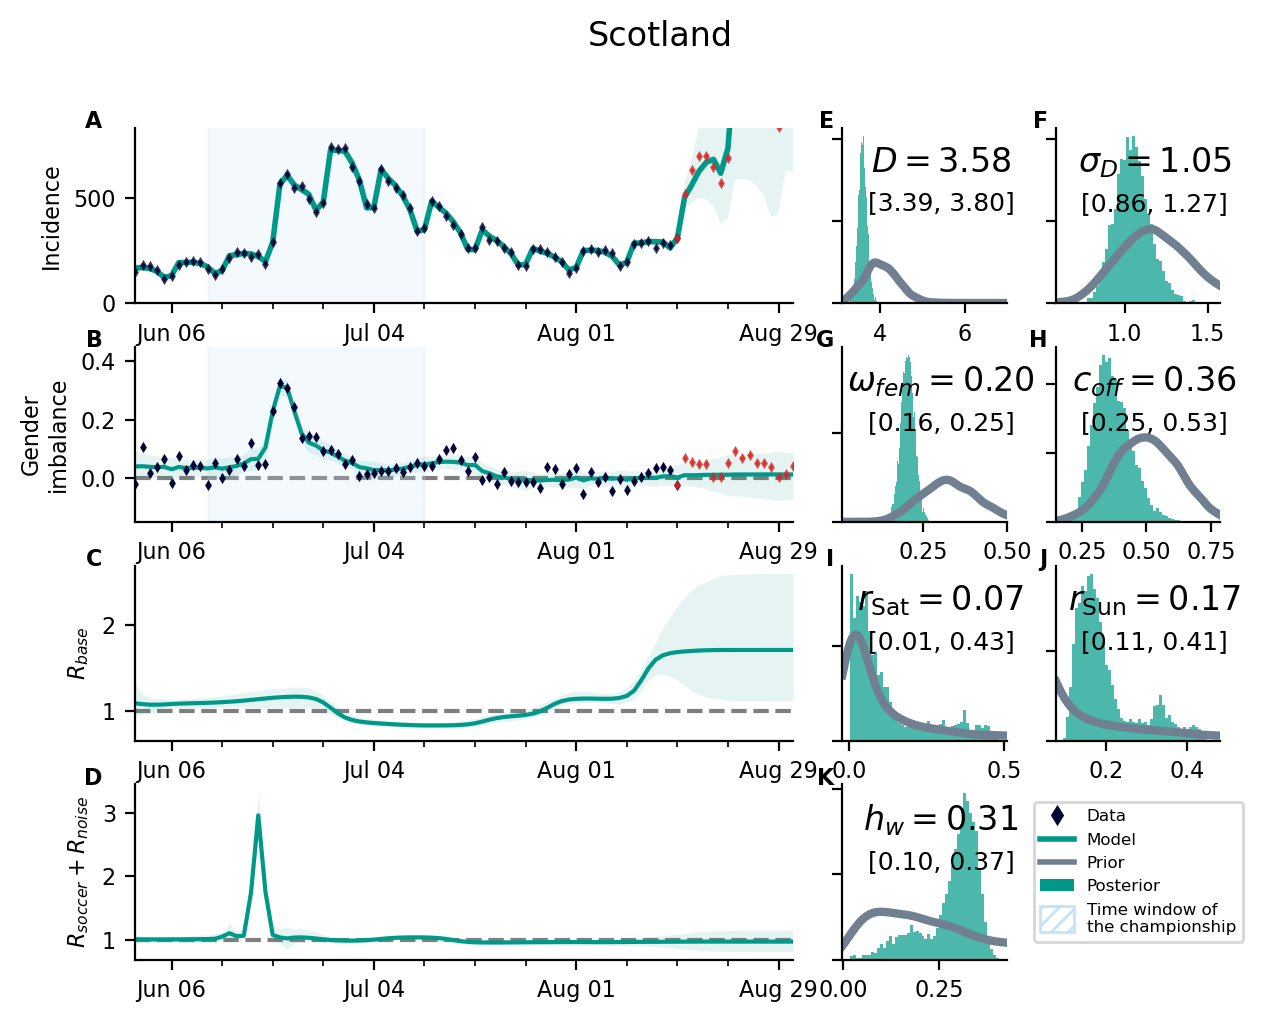

/home/smohr/Repositories/covid19_soccer/notebooks/supplementary/../../covid19_soccer/plot/other.py:929: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  lines.append(Patch([0], [0], color=rcParams.color_posterior, lw=0,),)


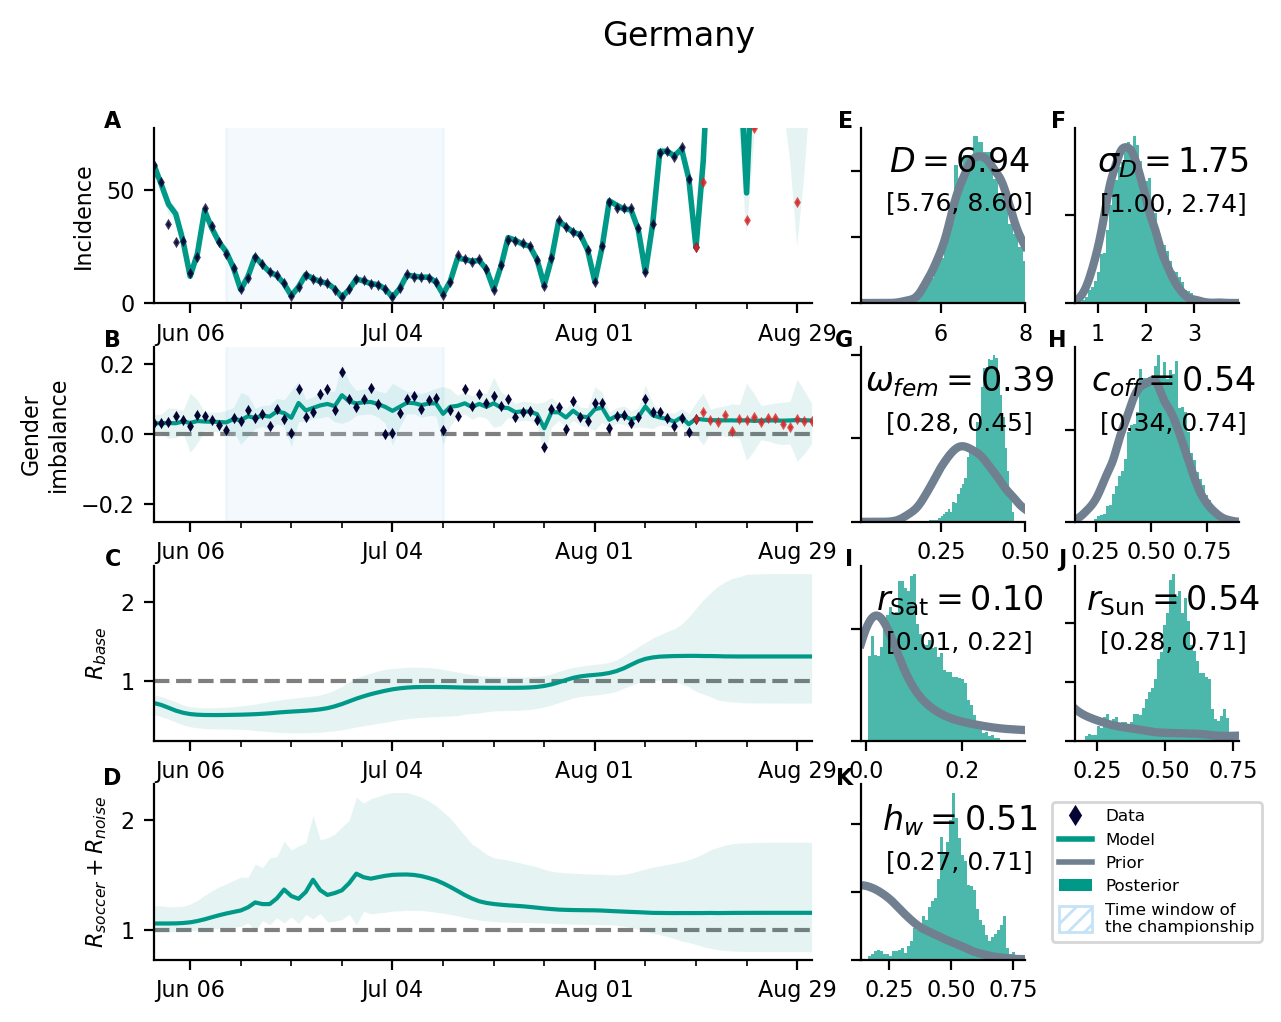

/home/smohr/Repositories/covid19_soccer/notebooks/supplementary/../../covid19_soccer/plot/other.py:929: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  lines.append(Patch([0], [0], color=rcParams.color_posterior, lw=0,),)


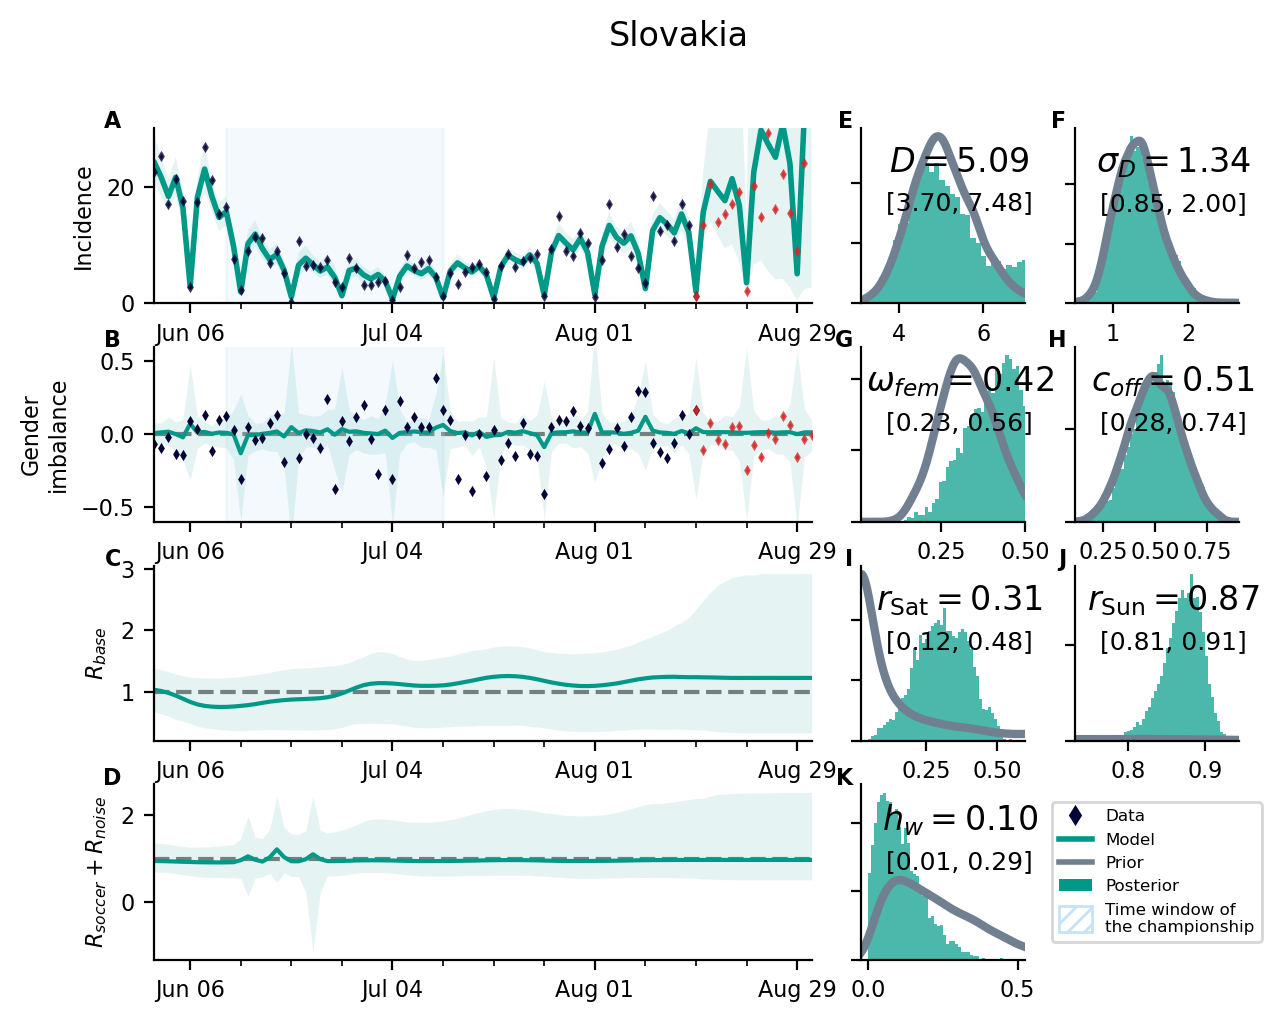

/home/smohr/Repositories/covid19_soccer/notebooks/supplementary/../../covid19_soccer/plot/other.py:929: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  lines.append(Patch([0], [0], color=rcParams.color_posterior, lw=0,),)


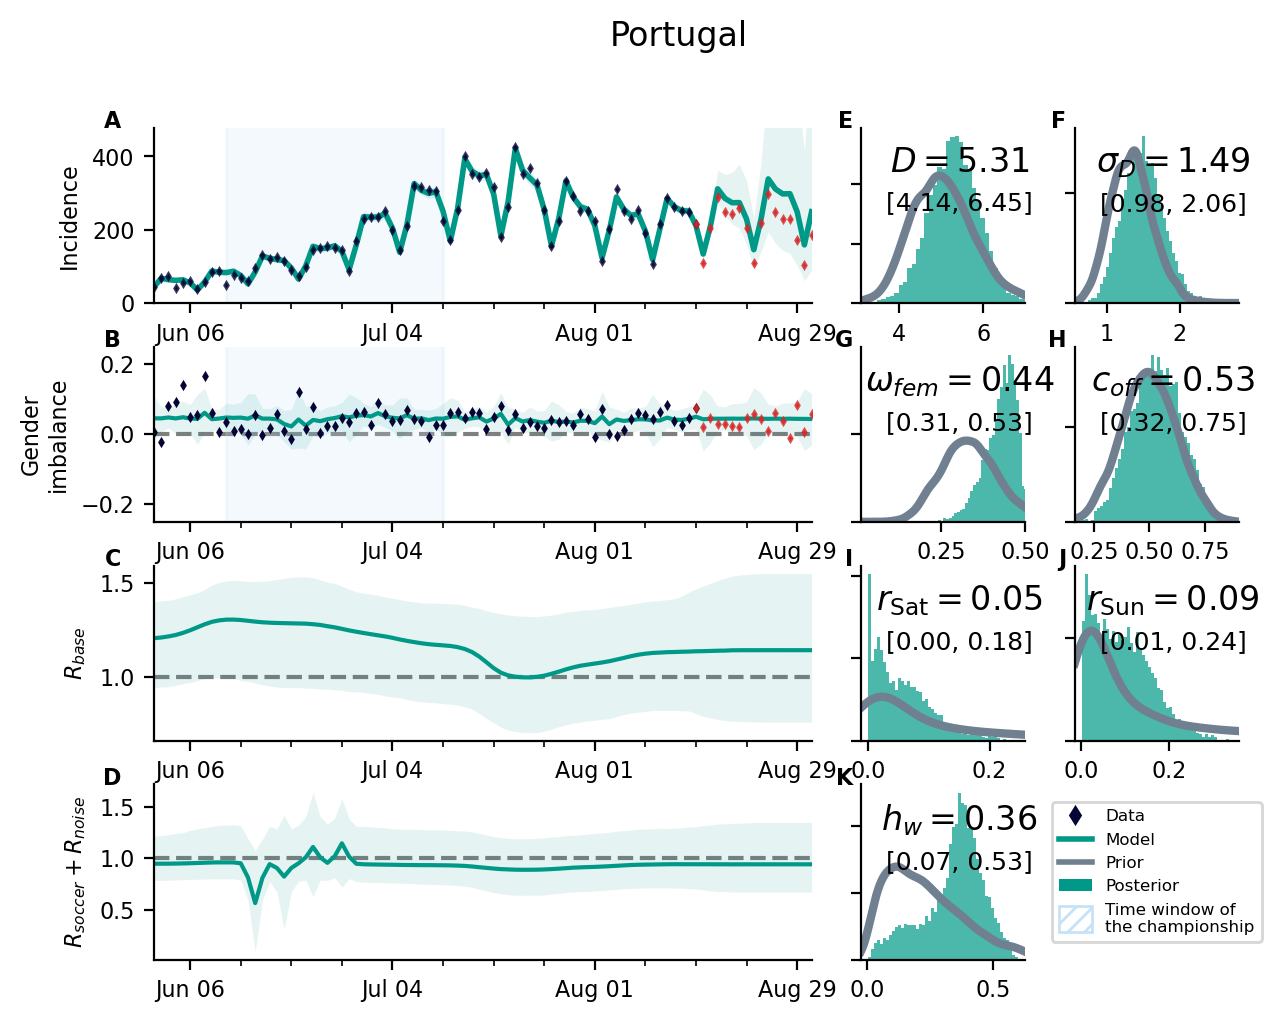

/home/smohr/Repositories/covid19_soccer/notebooks/supplementary/../../covid19_soccer/plot/other.py:929: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  lines.append(Patch([0], [0], color=rcParams.color_posterior, lw=0,),)


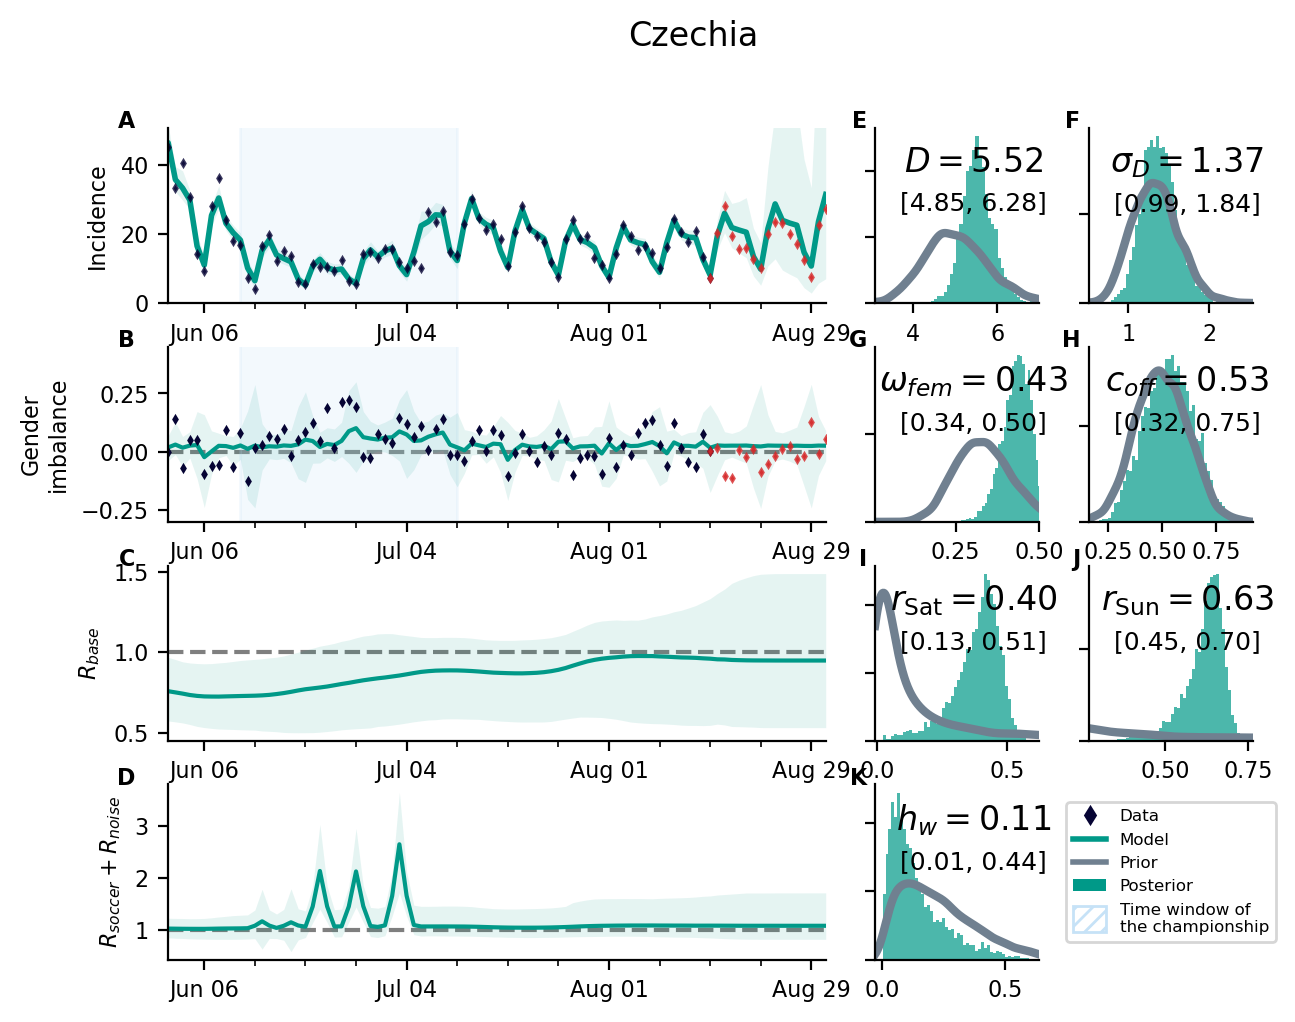

/home/smohr/Repositories/covid19_soccer/notebooks/supplementary/../../covid19_soccer/plot/other.py:929: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  lines.append(Patch([0], [0], color=rcParams.color_posterior, lw=0,),)


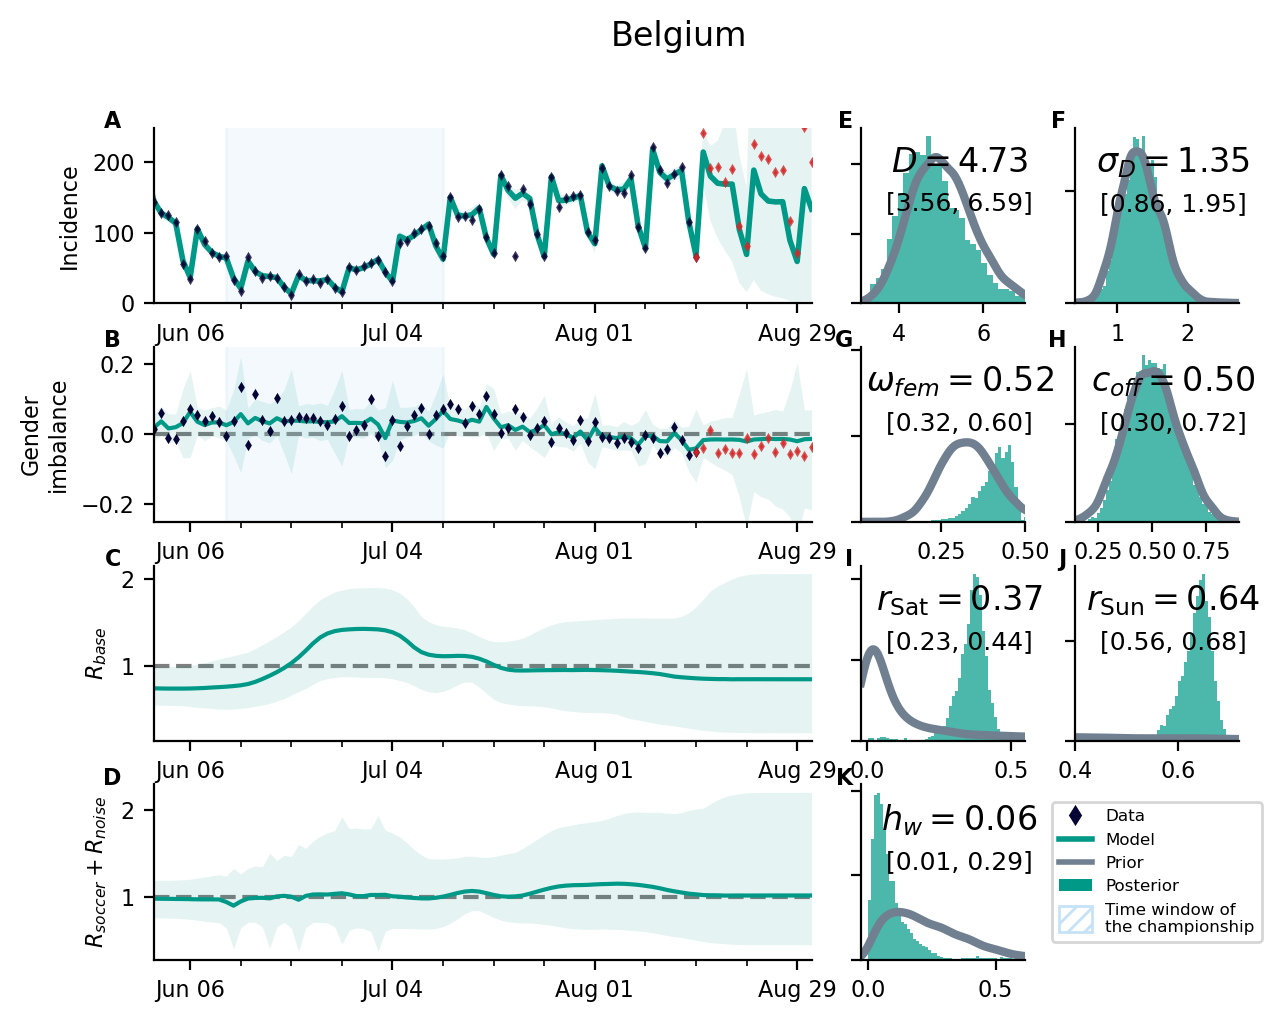

/home/smohr/Repositories/covid19_soccer/notebooks/supplementary/../../covid19_soccer/plot/other.py:929: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  lines.append(Patch([0], [0], color=rcParams.color_posterior, lw=0,),)


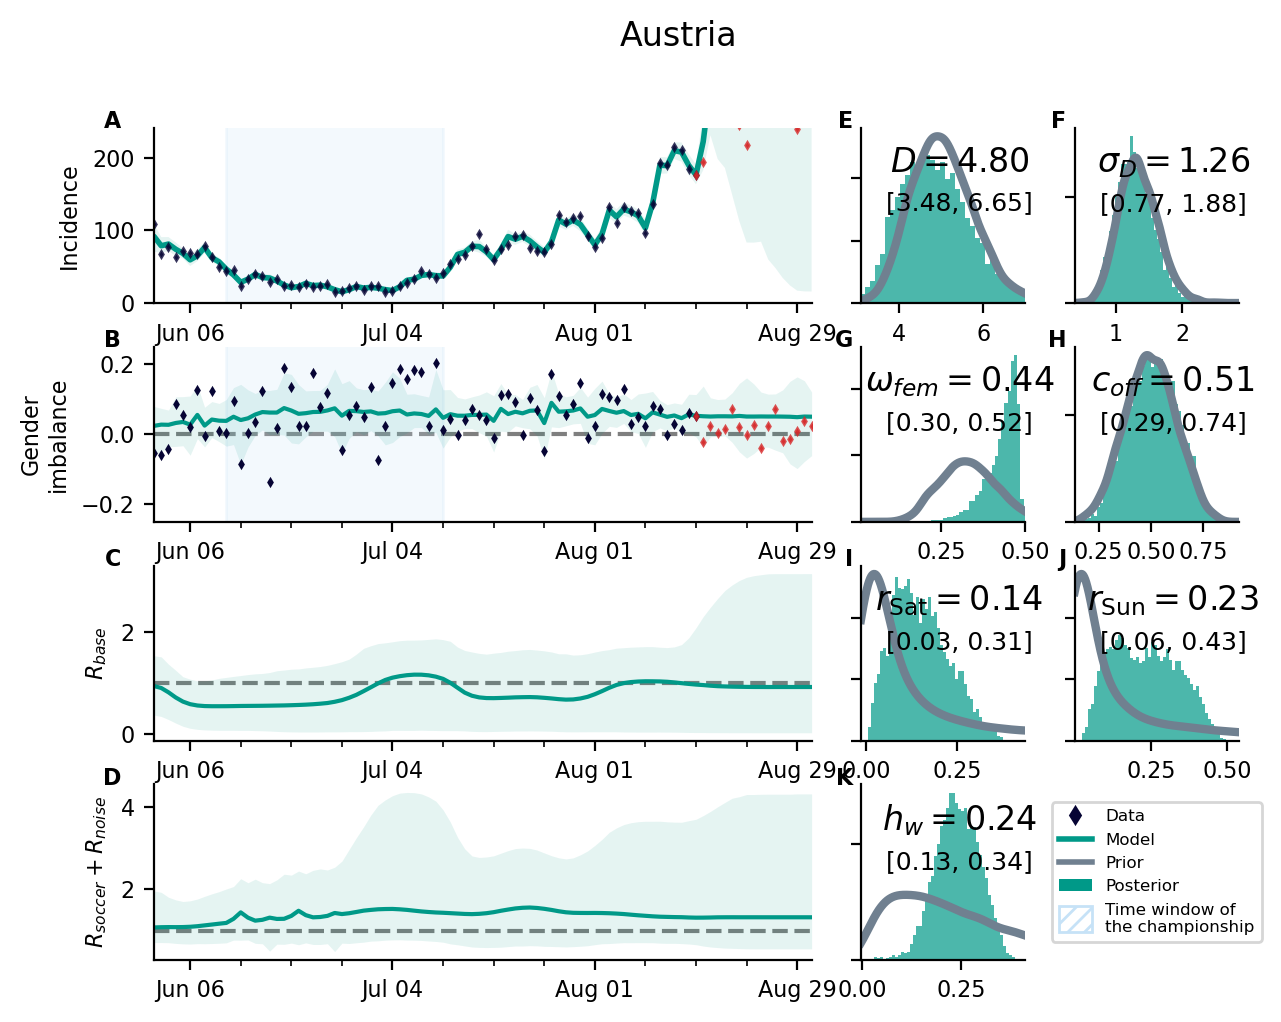

In [33]:
from covid19_soccer.plot.overview import single_extended

country2ylim_inbalance = {
    "England": [-0.15,0.3],
    "Scotland": [-0.15,0.45],
    "Slovakia": [-0.6,0.6],
    "Italy": [-0.3,0.45],
    "Czechia": [-0.3,0.45]
}

for trace,model,dl in zip(traces,models,dls):

    country = dl.countries[0]
    
    if  country in country2ylim_inbalance:
        ylim_imbalance = country2ylim_inbalance[country]
    else:
        ylim_imbalance = [-0.25,0.25]
    
    if country == "Italy":
        ylim_incidence=[0,220]
    else:
        ylim_incidence=None
    
    fig0 = single_extended(trace, model, dl, ylim_imbalance=ylim_imbalance,ylim_incidence=ylim_incidence)

    fig0.suptitle(f"{dl.countries[0]}")

    plt.show()
    #fig0.savefig(f"../figures/other_countries/extended_overview_{dl.countries[0]}.pdf", **save_kwargs)
    #fig0.savefig(f"../figures/other_countries/extended_overview_{dl.countries[0]}.png", **save_kwargs)
    plt.close(fig=fig0)

Country	2.5	50.0	97.5	>0
England0	8.861142667399854	13.303108640562701	18.074791620222758	1.0
Italy8	-0.7094793741249288	10.21608087625921	23.925379093039727	0.9658707338417302
Czechia9	2.3557403195764497	8.095827687444995	14.706072651308927	0.9944285714285714
Austria11	-4.517029420690261	3.0606873012838975	11.141805584345947	0.8005751437859465
Scotland1	1.969353174370664	2.8980253245910417	3.9128250640226097	1.0
France3	-1.1770840059309247	0.6151691394681476	2.613321025084944	0.764875
Germany2	-3.421024744017096	0.5446618603301396	3.5508166699092234	0.647875
Portugal6	-2.983961011181691	0.202285727647073	2.432999201305322	0.570375
Belgium10	-4.559829035424478	-0.20686105514883532	4.804058336707235	0.45625
Netherlands7	-2.603992748312345	-1.0186524662888656	-0.04560500072422387	0.019875
Spain4	-5.469700503033641	-1.4147022420589792	4.927340764666829	0.227125
Slovakia5	-30.3480213583654	-4.426143874464724	9.969863189096724	0.3348630044540424


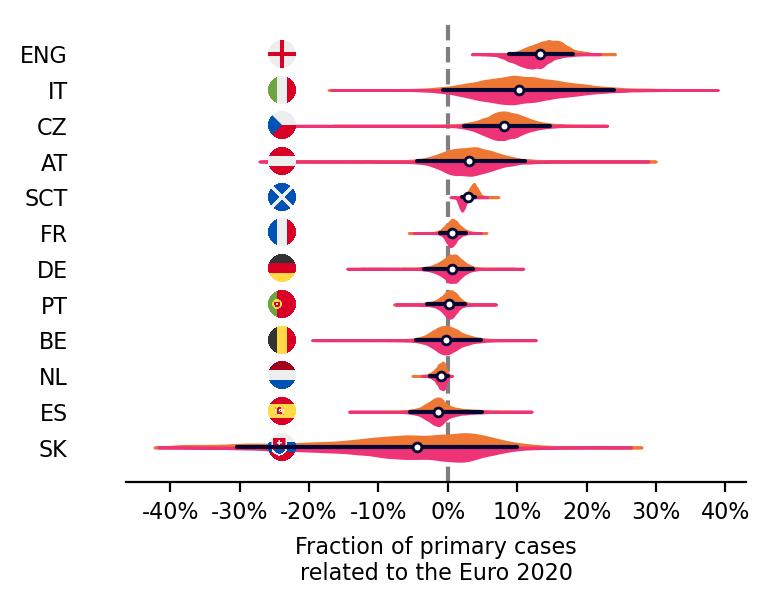

In [28]:
from covid19_soccer.plot.other import soccer_related_cases_overview

fig,ax = plt.subplots(1,1,figsize=(4,3))

soccer_related_cases_overview(
        ax,
        traces,
        models,
        dls,
        plot_flags=True,
        ypos_flags=-20,
        remove_outliers=True,
        bw=0.1,
        country_order=None,
        overall_effect_trace=None,
        vertical=True,
)
plt.show()